### With what information does Bayes Theorem update our previous knowledge about the data parameters?

1. By combining our previous knowledge (called the prior distribution),
2. With new information obtained from observed data,
3. Resulting in updated parameter knowledge (called the posterior distribution).

### What does the prior probability represent?

Prior probability, in Bayesian statistical inference, is the probability of an event before new data is collected. This is the best rational assessment of the probability of an outcome based on the current knowledge before an experiment is performed. 

It often simply called the prior, of an uncertain quantity is the probability distribution that would express one's beliefs about this quantity before some evidence is taken into account.

### Wine Analysis

In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load training dataset
wine_train = pd.read_csv('https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_training.csv')
# load test dataset
wine_test = pd.read_csv('https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_test.csv')

In [3]:
wine_train.head()

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low


Build contingency tables for calculations.

In [4]:
# contingency tables for Type and Alcohol_flag
ct1 = pd.crosstab(wine_train.Type, wine_train.Alcohol_flag, margins=True)
ct1

Alcohol_flag,High,Low,All
Type,,,
Red,218,282,500
White,268,232,500
All,486,514,1000


In [5]:
# contingency tables for Type and Sugar_flag
ct2 = pd.crosstab(wine_train.Type, wine_train.Sugar_flag, margins=True)
ct2

Sugar_flag,High,Low,All
Type,,,
Red,116,384,500
White,300,200,500
All,416,584,1000


In [6]:
# The prior probability of Type = Red and Type = White.
prob1 = ct1['All']['Red']/ct1['All']['All']
print("The prior probability of Type = Red is ", round(prob1*100,2), "%")
print("The prior probability of Type = White is ", round((1-prob1)*100,2), "%")

# The probability of high and low alcohol content.
prob2 = ct1['High']['All']/ct1['All']['All']
print("The probability of high content is ", round(prob2*100,2), "%")
print("The probability of low content is ", round((1-prob2)*100,2), "%")

# The probability of high and low sugar content.
prob3 = ct2['High']['All']/ct2['All']['All']
print("The probability of high sugar content is ", round(prob3*100,2), "%")
print("The probability of low sugar content is ", round(prob3*100,2), "%")

# The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
prob4 = ct1['High']['Red']/ct1['All']['Red']
print("The onditional probabilities p(Alcohol_flag = High ∣ Type = Red) is ", round(prob4*100,2), "%")
print("The onditional probabilities p(Alcohol_flag = Low ∣ Type = Red) is ", round((1-prob4)*100,2), "%")

# The conditional probabilities p(Alcohol_flag = High ∣ Type = White) and p(Alcohol_flag = Low ∣ Type = White).
prob5 = ct1['High']['White']/ct1['All']['White'] 
print("The conditional probabilities p(Alcohol_flag = High ∣ Type = White) is ", round(prob5*100, 2), "%")
print("The conditional probabilities p(Alcohol_flag = Low ∣ Type = White) is ", round((1-prob5)*100, 2), "%")

# The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).
prob6 = ct2['High']['Red']/ct2['All']['Red']
print("The conditional probabilities p(Sugar_flag = High ∣ Type = Red) is ", round(prob6*100, 2), "%")
print("The conditional probabilities p(Sugar_flag = Low ∣ Type = Red) is ", round((1-prob6)*100, 2), "%")

# The conditional probabilities p(Sugar_flag = High ∣ Type = White) and p(Sugar_flag = Low ∣ Type = White).
prob7 = ct2['High']['White']/ct2['All']['White']
print("The conditional probabilities p(Sugar_flag = High ∣ Type = White) is ", round(prob7*100, 2), "%")
print("The conditional probabilities p(Sugar_flag = Low ∣ Type = White) is ", round((1-prob7)*100, 2), "%")

The prior probability of Type = Red is  50.0 %
The prior probability of Type = White is  50.0 %
The probability of high content is  48.6 %
The probability of low content is  51.4 %
The probability of high sugar content is  41.6 %
The probability of low sugar content is  41.6 %
The onditional probabilities p(Alcohol_flag = High ∣ Type = Red) is  43.6 %
The onditional probabilities p(Alcohol_flag = Low ∣ Type = Red) is  56.4 %
The conditional probabilities p(Alcohol_flag = High ∣ Type = White) is  53.6 %
The conditional probabilities p(Alcohol_flag = Low ∣ Type = White) is  46.4 %
The conditional probabilities p(Sugar_flag = High ∣ Type = Red) is  23.2 %
The conditional probabilities p(Sugar_flag = Low ∣ Type = Red) is  76.8 %
The conditional probabilities p(Sugar_flag = High ∣ Type = White) is  60.0 %
The conditional probabilities p(Sugar_flag = Low ∣ Type = White) is  40.0 %


#### Use the probabilities in the previous exercise to discuss

- How likely it is that a randomly selected wine is red.
- How likely it is that a randomly selected wine has a high alcohol content.
- How likely it is that a randomly selected wine has a low sugar content.

In [7]:
print("The probability that a randomly selected wine is red is ", round(prob1*100, 2), "%")
print("The probability that a randomly selected wine has a high alcohol content is ", round(prob2*100, 2), "%")
print("The probability that a randomly selected wine has a low sugar content is ", round((1-prob3)*100, 2), "%")

The probability that a randomly selected wine is red is  50.0 %
The probability that a randomly selected wine has a high alcohol content is  48.6 %
The probability that a randomly selected wine has a low sugar content is  58.4 %


#### Use the conditional probabilities found earlier to discuss

##### Q: What a typical white wine might have as its alcohol and sugar content.
A typical white wine might have high alcohol and high sugar.

##### Q: What a typical red wine might have as its alcohol and sugar content.
A typical red wine might have low alcohol and low sugar.

Create side‐by‐side bar graphs for Type, one with an overlay of Alcohol_flag and the other with an overlay of Sugar_flag. Compare the graphs to the conditional probabilities you calculated.

<AxesSubplot:xlabel='Type'>

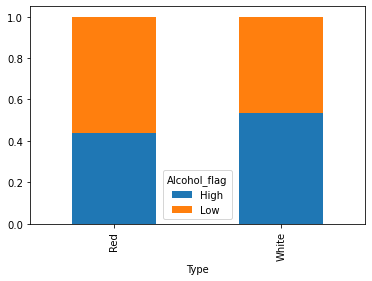

In [8]:
crosstab_01 = pd.crosstab(wine_train['Type'], wine_train['Alcohol_flag'])
crosstab_norm_01 = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm_01.plot(kind = 'bar', stacked = True)

<AxesSubplot:xlabel='Type'>

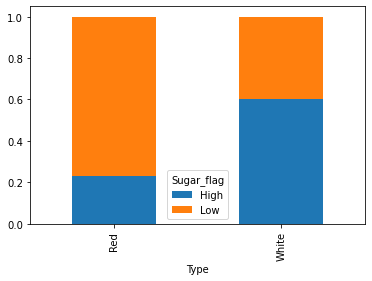

In [9]:
crosstab_02 = pd.crosstab(wine_train['Type'], wine_train['Sugar_flag'])
crosstab_norm_02 = crosstab_02.div(crosstab_02.sum(1),axis = 0)
crosstab_norm_02.plot(kind = 'bar', stacked = True)

Compare with the conditional probabilities I calculated, the graphs showcase the same results.

#### Compute the posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content. Compute the posterior probability of Type = White for the same wine.

#### Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with low alcohol and high sugar content. What would the Naïve Bayes classifier classify this wine as?

In [10]:
prob8 = (1-prob4) * prob6 * prob1 / (1-prob2) / prob3
prob9 = (1-prob5) * prob7 * (1-prob1) / (1-prob2) / prob3
print("P(Red|Low Alcohol & High Sugar) = ", round(prob8*100,2), "%")
print("P(White|Low Alcohol & High Sugar) = ", round(prob9*100,2), "%")

P(Red|Low Alcohol & High Sugar) =  30.6 %
P(White|Low Alcohol & High Sugar) =  65.1 %


Since the posterior probability of a low alcohol, high sugar wine being red is lower than the posterior probability of the same wine being white, the Naïve Bayes algorithm will classify the wine as White.

#### Compute the posterior probability of Type = Red for a wine that is high in alcohol content and low in sugar content. Compute the posterior probability of Type = White for the same wine.

#### Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with high alcohol and low sugar content. What would the Naïve Bayes classifier classify this wine as?

In [11]:
prob10 = prob4 * (1-prob6) * prob1 / prob2 / (1-prob3)
prob11 = prob5 * (1-prob7) * (1-prob1) / prob2 / (1-prob3)
print("P(Red|High Alcohol & Low Sugar) = ", round(prob10*100,2), "%")
print("P(White|High Alcohol & Low Sugar) = ", round(prob11*100,2), "%")

P(Red|High Alcohol & Low Sugar) =  58.99 %
P(White|High Alcohol & Low Sugar) =  37.77 %


Since the posterior probability of a high alcohol, low sugar wine being red is higher than the posterior probability of the same wine being white, the Naïve Bayes algorithm will classify the wine as Red.

#### Run the Naïve Bayes classifier to classify wines as white or red based on alcohol and sugar content.

In [12]:
wine_train['Type']= wine_train['Type'].replace({'Red': 1})
wine_train['Type']= wine_train['Type'].replace({'White': 0})
wine_train['Alcohol_flag']= wine_train['Alcohol_flag'].replace({'Low': 0})
wine_train['Alcohol_flag']= wine_train['Alcohol_flag'].replace({'High': 1})
wine_train['Sugar_flag']= wine_train['Sugar_flag'].replace({'Low': 0})
wine_train['Sugar_flag']= wine_train['Sugar_flag'].replace({'High': 1})
X_train = wine_train.drop(['Type'], axis =1)
y_train = wine_train['Type']

nb = GaussianNB().fit(X_train, y_train)

In [13]:
wine_test['Type']= wine_test['Type'].replace({'Red': 1})
wine_test['Type']= wine_test['Type'].replace({'White': 0})
wine_test['Alcohol_flag']= wine_test['Alcohol_flag'].replace({'Low': 0})
wine_test['Alcohol_flag']= wine_test['Alcohol_flag'].replace({'High': 1})
wine_test['Sugar_flag']= wine_test['Sugar_flag'].replace({'Low': 0})
wine_test['Sugar_flag']= wine_test['Sugar_flag'].replace({'High': 1})
X_test = wine_test.drop(['Type'], axis =1)
y_test = wine_test['Type']

#### Evaluate the Naïve Bayes model on the wines_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

In [14]:
y_predict = nb.predict(X_test)
y_predict = pd.DataFrame(y_predict,index = y_test.index, columns = ['Predict'])
y_test = wine_test[['Type']]
y_test.rename(columns={'Type':'Actual'},inplace=True)
df = y_predict.join(y_test)
df['Predict']= df['Predict'].replace({1: 'Red'})
df['Predict']= df['Predict'].replace({0: 'White'})
df['Actual']= df['Actual'].replace({1: 'Red'})
df['Actual']= df['Actual'].replace({0: 'White'})
ct3 = pd.crosstab(df.Predict, df.Actual, margins=True)
ct3

/Users/sean/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Actual,Red,White,All
Predict,,,
Red,464,678,1142
White,121,1082,1203
All,585,1760,2345


#### According to your table in the previous exercise, find the following values for the Naïve Bayes model:

- Accuracy
- Error rate

In [15]:
accuracy = (ct3['Red']['Red']+ct3['White']['White'])/ct3['All']['All']
error_rate = 1-accuracy
print("The Accuracy of the Naive Bayes model is ", round((accuracy*100),2), "%")
print("The Error Rate of the Naive Bayes model is ", round((error_rate*100),2), "%")

The Accuracy of the Naive Bayes model is  65.93 %
The Error Rate of the Naive Bayes model is  34.07 %


#### According to your contingency table, find the following values for the Naïve Bayes model:

- How often it correctly classifies red wines.
- How often it correctly classifies white wines.

In [16]:
red = ct3['Red']['Red']/ct3['All']['Red']
white = ct3['White']['White']/ct3['All']['White']
print("The Naive Bayes model predicts ", round((red*100),2), "% red wines correctly.")
print("The Naive Bayes model predicts ", round((white*100),2), "% white wines correctly.")

The Naive Bayes model predicts  40.63 % red wines correctly.
The Naive Bayes model predicts  89.94 % white wines correctly.


#### Name a few classification algorithm, choose one and use it on a dataset of your choosing.

- Decision Tree
- Random Forest
- Neural Network
- Logistic Regression

#### For this case, I will chose Random Forest for Classification

First, I will create a synthetic binary classification problem with 1,000 examples and 20 input features.

In [17]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [18]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [19]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.023)


In this case, the random forest ensemble with default hyperparameters achieves a classification accuracy of about 90.5%.

#### Apply ANN and decision tree algorithm on the wine dataset and compare the result? which one is better and why?

In [20]:
X_train = wine_train.drop(['Type'], axis =1)
y_train = wine_train['Type']
X_test = wine_test.drop(['Type'], axis =1)
y_test = wine_test['Type']

In [21]:
# Multi-layer Perceptron classifier
nn = MLPClassifier(random_state=42).fit(X_train, y_train)
y_pred = nn.predict(X_test)
print('Accuracy =', round(np.mean(y_pred == y_test), 4))

Accuracy = 0.6593


In [22]:
# decision tree
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy =', round(np.mean(y_pred == y_test), 4))

Accuracy = 0.6593


The accuracy for both model are the same due to the small number (only two) of predictors, as well as the type (both of them are binary).